# Agregagador de CSV's

Agrega os csv's de cada órgão em um só csv (remuneracao_servidores.csv), criando os atributos 'ORGAO', 'ANO' e 'MES'. 

In [3]:
import pandas as pd
import os
import re

def list_dirs(path):
    dirs=[]
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for direc in d:
            print(direc)
            if '.txt' not in direc:
                dirs.append(os.path.join(r, direc))
    return dirs


def list_files(path):
    files = []
    for r, d, f in os.walk(path):
        for file in f:
            if '.csv' in file:
                f_out = os.path.join(r, file)
                files.append(f_out)
    return files

def cria_df_orgao(path):
    files = list_files(path)
    df_orgao = pd.DataFrame()
    for f in files:
        if '.csv' in f:
            df_mes = pd.read_csv(f, sep=';', header=0, decimal=',')
            
            file_name = f.split("_")[1]
            orgao_name = path.split("/")[1]
            
            mes = file_name[4:6]
            ano = file_name[0:4]
            
            df_mes["ANO"] = ano
            df_mes["MES"] = mes
            
            df_orgao= pd.concat([df_orgao, df_mes], ignore_index=True)
            df_orgao["ORGAO"] = orgao_name
    try:
        df_orgao.drop(['Unnamed: 10'], axis=1, inplace=True)
    except:
        print('Sem Coluna Unnamed')
    return df_orgao

def cria_df_geral(path):
    df_geral = pd.DataFrame()
    dirs = list_dirs(path)
    for d in dirs:
        if (str(d) == "csv/PM-ATIVOS" or str(d) == "csv/FUNDAÇÃO VILA OLIMPICA" or str(d)=="csv/PRODAM"):
            continue
        print("Processando diretório:", str(d))
        nome_dir = d.split("/")[1]
        ds_orgao = pd.DataFrame()
        df_orgao = cria_df_orgao(d)
        df_geral = pd.concat([df_geral,df_orgao], ignore_index=True)
        df_geral = trata_nan(df_geral)
    return df_geral

def trata_nan(df):
    for col in df.columns:
        if(df[col].dtype == 'object'):
            df[col] = df[col].fillna('-')
        if(df[col].dtype == 'float64'):
            df[col] = df[col].fillna(0.00)
    
    return df

def main():
    path = 'csv/'
    df_geral = cria_df_geral(path)
    df_geral.to_csv(r'remuneracao_servidores.csv')
    print (df_geral)
        
main()

SEAD-PENSÃO ESPECIAL I
SEPED
SEPLANCTI
SEAS
SRMM
SEAD-PENSÃO ESPECIAL II
SUHAB
SEAD-PENSÃO HANSENIANOS
DETRAN
ERGSP
SEJUSC
JUCEA
CB-CIVIS
PM-ATIVOS
CBMAM
CGE
SEPROR
PENSIONISTAS
SEMA
FEI
SERGB
IDAM
VICE-GOVERNADORIA
CASA MILITAR
PM-CIVIS
CETAM
SEAP
AMAZONPREV
POLICIA CIVIL
OUVIDORIA GERAL
ADAF
CASA CIVIL DO GOVERNO
SUSAM
PGE
ALFREDO DA MATA
UEA
FUNDAÇÃO VILA OLIMPICA
PRODAM
SEIND
FHEMOAM
SETRAB
FUNDAÇÃO AMAZONPREV
FEH
FUNTEC
SEC
IPAAM
SEAD
SEJEL
SEDUC
IMPRENSA OFICIAL
FVS
UGPE
SERIRA
ADS
FHAJ
SSP
ARSAM
FAPEAM
IPEM-AM
SECOM
FMT-AM
FCECON
SNPH
SPF
SEFAZ
SEINFRA
CGL
Processando diretório: csv/SEAD-PENSÃO ESPECIAL I


/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Processando diretório: csv/SEPED
Processando diretório: csv/SEPLANCTI
Processando diretório: csv/SEAS
Processando diretório: csv/SRMM
Processando diretório: csv/SEAD-PENSÃO ESPECIAL II
Processando diretório: csv/SUHAB
Processando diretório: csv/SEAD-PENSÃO HANSENIANOS
Processando diretório: csv/DETRAN
Processando diretório: csv/ERGSP
Processando diretório: csv/SEJUSC
Processando diretório: csv/JUCEA
Processando diretório: csv/CB-CIVIS
Processando diretório: csv/CBMAM
Processando diretório: csv/CGE
Processando diretório: csv/SEPROR
Processando diretório: csv/PENSIONISTAS
Processando diretório: csv/SEMA
Processando diretório: csv/FEI
Processando diretório: csv/SERGB
Sem Coluna Unnamed
Processando diretório: csv/IDAM
Processando diretório: csv/VICE-GOVERNADORIA
Processando diretório: csv/CASA MILITAR
Processando diretório: csv/PM-CIVIS
Processando diretório: csv/CETAM
Processando diretório: csv/SEAP
Processando diretório: csv/AMAZONPREV
Processando diretório: csv/POLICIA CIVIL
Processando

# Plotting

In [111]:
import matplotlib.pyplot as plt

file_path = r'remuneracao_servidores.csv'
rem_org = pd.read_csv(file_path, sep=',', header=0, decimal='.')

try:       
    rem_org.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print("no unnamed column.")
        
rem_org = rem_org.sort_values(by=['ANO', 'ORGAO', 'MES'])
# rem_org = rem_org.sort_values(['ANO'])
        
loc_orgao = rem_org["ORGAO"] == 'UEA'
anos = rem_org["ANO"].drop_duplicates()
orgaos = rem_org["ORGAO"].drop_duplicates()

rem_org.rename(columns={' REMUNERACAO LEGAL DEVIDA(R$)' : 'REMUNERACAO LEGAL DEVIDA(R$)'}, inplace=True)

In [52]:

print(rem_org.columns)


Index(['REMUNERACAO LEGAL DEVIDA(R$)', 'ANO', 'CARGO', 'DESC.TETO(R$)',
       'DESCONTOS LEGAIS(R$)', 'FUNCAO', 'LIQUIDO DISPONIVEL(R$)', 'LOTACAO',
       'MES', 'NOME', 'ORGAO', 'REMUNERACAO LEGAL TOTAL(R$)', 'VINCULO'],
      dtype='object')


ADS
FHEMOAM
SECOM
SEAD
### 2014
###### 1
0.0
###### 2
0.0
###### 3
0.0
###### 4
0.0
###### 5
0.0
###### 6
0.0
###### 7
0.0
###### 8
0.0
###### 9
0.0
###### 10
0.0
###### 11
0.0
###### 12
0.0
### 2015
###### 1
0.0
###### 2
0.0
###### 3
0.0
###### 4
0.0
###### 5
0.0
###### 6
0.0
###### 7
0.0
###### 8
0.0
###### 9
0.0
###### 10
0.0
###### 11
0.0
###### 12
0.0
### 2016
###### 1
118931.83
###### 2
0.0
###### 3
0.0
###### 4
0.0
###### 5
0.0
###### 6
38720.0
###### 7
37840.0
###### 8
36080.0
###### 9
33440.0
###### 10
29040.0
###### 11
29040.0
###### 12
27280.0
### 2017
###### 1
25520.0
###### 2
25520.0
###### 3
27326.0
###### 4
22488.0
###### 5
1568385.76
###### 6
1506067.4600000002
###### 7
1484654.25
###### 8
1465127.7500000002
###### 9
1469592.9700000002
###### 10
1591909.7400000002
###### 11
1497703.04
###### 12
1610014.7300000002
### 2018
###### 1
1765756.08
###### 2
1709758.21
###### 3
1644754.25
###### 4
1618446.8399999999
###### 5
1745506.33
###### 6
1908479.31
###### 7
1842981.16000

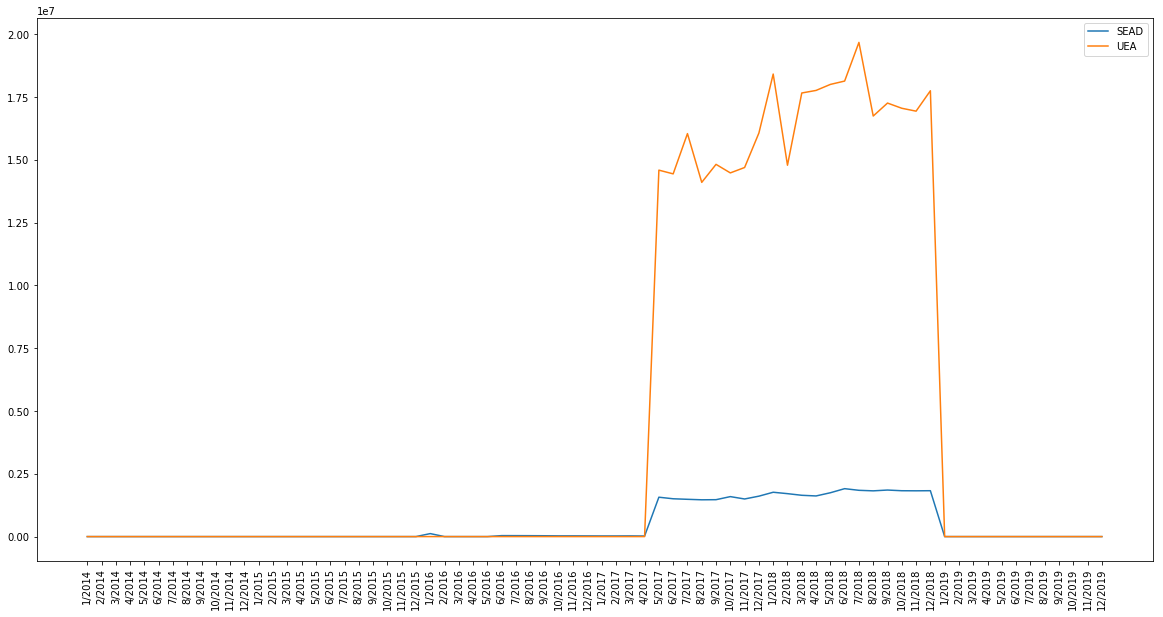

In [133]:
c_org = 0
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    
    orgao_tots = []
    if(orgao != 'UEA' and orgao != 'SEAD'):
        continue
    for ano in anos:
        print("###", ano)
        
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
            print("######", mes)
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            print(rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum())
#         print(rem)
#         orgao_tots.append(rem.groupby(by='ORGAO').sum()/rem.groupby(by='ORGAO').count()[])
#         rem_geral.plot(kind='bar', figsize=(20,5))
            orgao_tots.append(rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum())
            data.append(str(mes) + "/" + str(ano))
    plt.plot(orgao_tots, label = orgao)
    plt.legend(loc=0)
    ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        
    c_org += 1

    

In [67]:
uea_rem = rem.loc[rem['ORGAO'] == 'UEA']
print(uea_rem)

        REMUNERACAO LEGAL TOTAL(R$) ORGAO
1516950                      4000.0   UEA
1516951                      4500.0   UEA
1516952                    11253.67   UEA
1516953                     8784.01   UEA
1516954                    13332.55   UEA
1516955                     8728.22   UEA
1516956                     5164.99   UEA
1516957                     9598.53   UEA
1516958                     1943.69   UEA
1516959                    13290.15   UEA
1516960                    18372.57   UEA
1516961                      1500.0   UEA
1516962                    11810.36   UEA
1516963                    13290.15   UEA
1516964                     1973.64   UEA
1516965                     2666.67   UEA
1516966                     11804.0   UEA
1516967                     8784.01   UEA
1516968                     8847.44   UEA
1516969                      9003.2   UEA
1516970                    16386.44   UEA
1516971                      3000.0   UEA
1516972                      4500.